## Observations and Insights 

* It appears that Capomulin is the most useful drug when treating tumors in mice.
* Propriva appears to the least effective 
* There is a strong correlation between mouse weight and tumor volume

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")


# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
mouse_num = mouse_df.drop_duplicates("Mouse ID")

len(mouse_num)

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate Rows based on Mouse ID and Timepoint")

#Print duplicate
duplicate.head()

Duplicate Rows based on Mouse ID and Timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_df_f = mouse_df.drop_duplicates(keep=False)

mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
mouse_df_f[["Mouse ID"]].describe()

,Mouse ID
count,1891
unique,249
top,g989
freq,11


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_df = mouse_df_f[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]].copy()

grouped_stats_df = stats_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = grouped_stats_df["Tumor Volume (mm3)"].mean()

tumor_median = grouped_stats_df["Tumor Volume (mm3)"].median()

tumor_variance = grouped_stats_df["Tumor Volume (mm3)"].var()

tumor_sd = grouped_stats_df["Tumor Volume (mm3)"].std()

tumor_sem = grouped_stats_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Standard Deviation": tumor_sd, "SEM": tumor_sem})

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

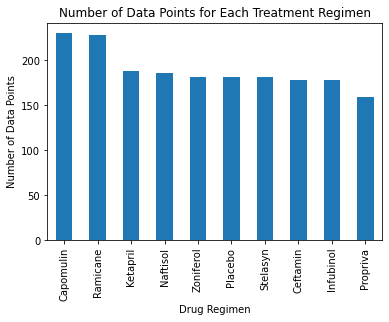

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements_bar = stats_df['Drug Regimen'].value_counts().plot.bar()

#Label Axis
# Set labels for axes
total_measurements_bar.set_xlabel("Drug Regimen")
total_measurements_bar.set_ylabel("Number of Data Points")
total_measurements_bar.set_title("Number of Data Points for Each Treatment Regimen")



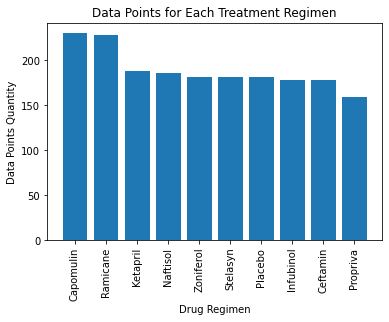

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts = stats_df['Drug Regimen'].value_counts()

#set x-axis to the length of the above
x_axis = np.arange(len(drug_counts))

#Generate bar graph
plt.bar(x_axis, drug_counts)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
                            'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'])

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axies
plt.xlabel("Drug Regimen")
plt.ylabel('Data Points Quantity')
plt.title('Data Points for Each Treatment Regimen')

# Display resulting plot
plt.show()


Text(0, 0.5, '')

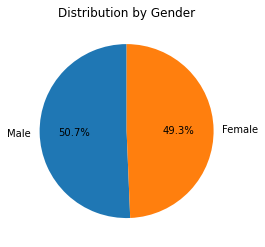

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = stats_df['Sex'].value_counts()

#plot pie chart using pandas
gender_pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Gender')

#hide y label
gender_pie_plot.set_ylabel('') 


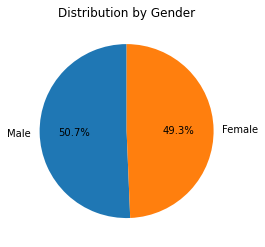

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data_py = stats_df['Sex'].value_counts()

#make the pie graph
plt.pie(gender_data_py, labels=gender_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Gender')

#show pie
plt.show() 


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(stats_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(stats_df, max_timepoint_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]

    
    # add subset 
    final_volume_df = drug_tumor_df.loc[drug_tumor_df['Timepoint'] == drug_tumor_df['max_timepoint']]

    
    #List final tumor values
    values = final_volume_df['Tumor Volume (mm3)']

    tumor_volume_data.append(values)
    
    #Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f'IQR for {treatment}: {iqr}')
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {treatment} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


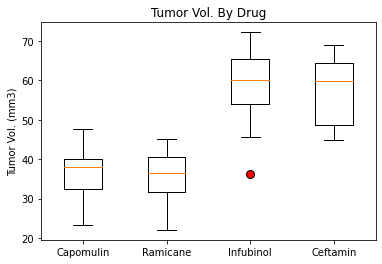

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Tumor Vol. By Drug')
plt.ylabel('Tumor Vol. (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show() 

## Line and Scatter Plots

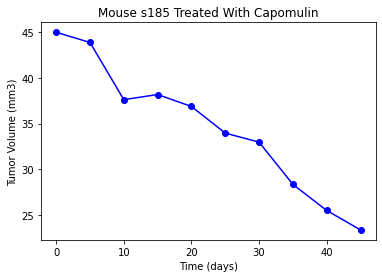

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin'].head(10)

mouse = merged_df.loc[merged_df['Mouse ID'] == 's185']


#Plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Treated With Capomulin")

# Display plot
plt.show()

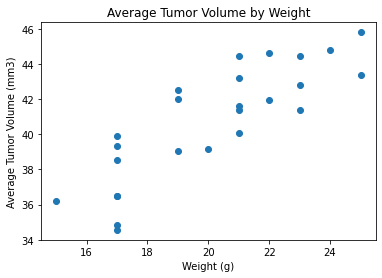

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Make df for just capomulin
capomulin_df = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin regimen is 0.84. This implies a strong, positive relationship.


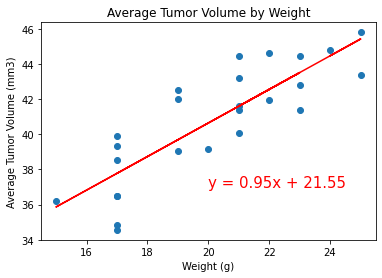

In [37]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

#Copy code from above to get scatter data
#Make df for just capomulin
capomulin_df = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

#calculate correlation coefficient 
correlation_coef = st.pearsonr(x_data, y_data)

# Print the answer to above calculation
print(f'The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation_coef[0],2)}. This implies a strong, positive relationship.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter and linear regression
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

 